# KNN no `chb20_com_dwt`

Explorando 20 rodadas de classificação com `KNN` em sua configuração padrão com o dataframe extraído com DWT para encontrar canal com melhor desempenho.

Por fim salvando a tabela com médias, desvios padrão e medianas do desempenho de cada canal.

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

seed_array = np.load('./../20_seeds.npy')
print(f'seeds: {seed_array}')

seeds: [4382 8968 8442 1729  290  490 2128 1167 8900 5078 1359  894 7809 6990
 3623 5906 1687 7080 5473 7854]


## 20 rodadas

In [2]:
chb_DF = pd.read_csv('./chb20_com_dwt.csv')
target_S = chb_DF.pop('target')

accuracy_DF = pd.DataFrame()

# agrupa todas colunas pelo mesmo número do canal
colunas_agrupadas_por_numero = []
for i in range(18):
    colunas_agrupadas_por_numero.append(
        [column for column in chb_DF.columns if f'{i}' in column.split('-')]
    )

for numero_da_coluna, colunas in enumerate(colunas_agrupadas_por_numero):
    X, y = chb_DF[colunas].values, target_S.values

    acc = []   

    for seed in seed_array:
        # Distribuindo os dados
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
        
        # Instanciando e treinando classificador
        model = KNeighborsClassifier().fit(X_train, y_train)

        # Adicionando resultados às respectivas listas
        acc.append(model.score(X_test, y_test))

    accuracy_DF[f'{numero_da_coluna}'] = acc

accuracy_DF

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.872093,0.872093,0.872093,0.895349,0.790698,0.906977,0.953488,0.860465,0.767442,0.930233,0.872093,0.848837,0.883721,0.930233,0.941860,0.883721,0.720930,0.848837
1,0.872093,0.825581,0.837209,0.837209,0.813953,0.872093,0.918605,0.767442,0.767442,0.930233,0.883721,0.813953,0.848837,0.906977,0.883721,0.883721,0.813953,0.837209
2,0.906977,0.848837,0.883721,0.825581,0.848837,0.872093,0.918605,0.802326,0.767442,0.953488,0.895349,0.872093,0.813953,0.941860,0.906977,0.895349,0.779070,0.872093
3,0.837209,0.895349,0.930233,0.837209,0.848837,0.918605,0.930233,0.802326,0.732558,0.930233,0.918605,0.872093,0.837209,0.941860,0.918605,0.906977,0.837209,0.895349
4,0.825581,0.883721,0.883721,0.872093,0.837209,0.895349,0.918605,0.918605,0.744186,0.953488,0.860465,0.883721,0.860465,0.918605,0.930233,0.930233,0.732558,0.837209
5,0.872093,0.883721,0.872093,0.848837,0.837209,0.895349,0.825581,0.895349,0.744186,0.930233,0.872093,0.895349,0.860465,0.918605,0.895349,0.918605,0.767442,0.848837
6,0.848837,0.883721,0.860465,0.860465,0.848837,0.953488,0.906977,0.860465,0.779070,0.953488,0.860465,0.802326,0.906977,0.918605,0.860465,0.930233,0.779070,0.872093
7,0.837209,0.837209,0.895349,0.883721,0.779070,0.930233,0.918605,0.837209,0.697674,0.953488,0.930233,0.906977,0.825581,0.848837,0.918605,0.918605,0.744186,0.883721
8,0.918605,0.883721,0.883721,0.848837,0.837209,0.941860,0.930233,0.837209,0.813953,0.930233,0.872093,0.848837,0.837209,0.918605,0.895349,0.953488,0.744186,0.848837
9,0.883721,0.883721,0.895349,0.872093,0.860465,0.953488,0.941860,0.825581,0.825581,0.941860,0.918605,0.906977,0.872093,0.895349,0.895349,0.895349,0.744186,0.848837


,count,mean,std,min,25%,50%,75%,max
9,20.0,0.933721,0.015600,0.906977,0.918605,0.930233,0.944767,0.953488
6,20.0,0.917442,0.029441,0.825581,0.906977,0.918605,0.933140,0.953488
15,20.0,0.916279,0.024911,0.872093,0.895349,0.918605,0.930233,0.953488
13,20.0,0.906977,0.026942,0.848837,0.895349,0.918605,0.921512,0.941860
5,20.0,0.904070,0.027432,0.872093,0.883721,0.895349,0.921512,0.953488
14,20.0,0.903488,0.030439,0.837209,0.883721,0.906977,0.918605,0.965116
2,20.0,0.884884,0.023830,0.837209,0.872093,0.883721,0.895349,0.930233
10,20.0,0.884302,0.037055,0.813953,0.860465,0.877907,0.918605,0.953488
11,20.0,0.870349,0.040855,0.790698,0.848837,0.883721,0.906977,0.918605
1,20.0,0.869767,0.030788,0.802326,0.848837,0.877907,0.886628,0.918605


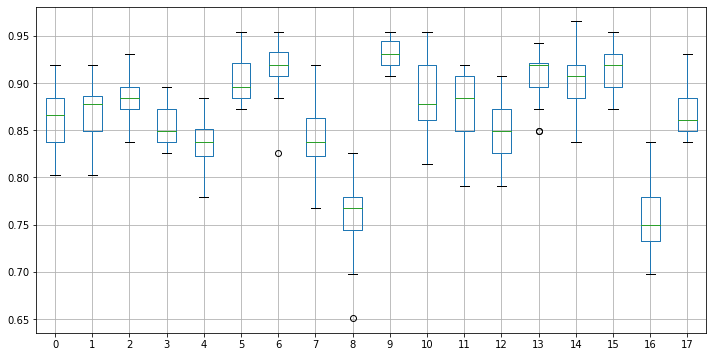

In [3]:
accuracy_DF.boxplot(figsize=(12, 6))
accuracy_DF.describe().transpose().sort_values(by='mean', ascending=False)

## Salvando rank em arquivo csv

In [4]:
save_DF = accuracy_DF.describe().transpose()[['mean', 'std', '50%']]
save_DF['chb'] = '20'
save_DF['channel'] = save_DF.index

save_DF.to_csv(path_or_buf='./knn_descr_channel_rank.csv', index=False)
save_DF

,mean,std,50%,chb,channel
0,0.863372,0.032205,0.866279,20,0
1,0.869767,0.030788,0.877907,20,1
2,0.884884,0.023830,0.883721,20,2
3,0.854070,0.022470,0.848837,20,3
4,0.836047,0.031541,0.837209,20,4
5,0.904070,0.027432,0.895349,20,5
6,0.917442,0.029441,0.918605,20,6
7,0.844186,0.036654,0.837209,20,7
8,0.757558,0.040152,0.767442,20,8
9,0.933721,0.015600,0.930233,20,9
